### Sum NEIC catalogued seismic moment 
(1 dyne-cm=10-7 N-m). 
Use a 0.5 degree grid

In [261]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

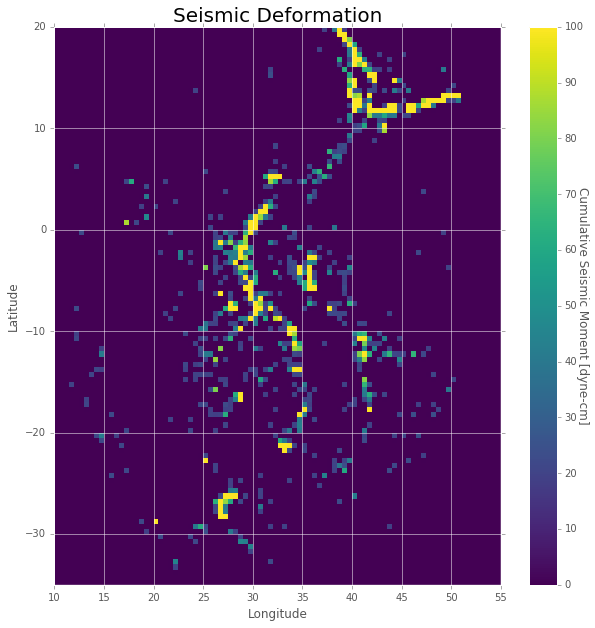

In [262]:
import pandas as pd
import numpy as np

lon_min = 10; # set some parameters for the grid search
lon_max = 55;
lat_min = -35;
lat_max = 20;
step=0.5;
lon_bins=np.arange(lon_min,lon_max,step)
lat_bins=np.arange(lat_min,lat_max,step)

M0 = np.zeros([len(lon_bins),len(lat_bins)]) #this is the array to fill
logfile=open('.01log','w') # write-out each event position to log

neicCat='./data/NEIC_Africa_gt4_5_short.csv' # file for catalog to read
cat = pd.read_csv(neicCat)

for xi,x in enumerate(lon_bins):
    for yi,y in enumerate(lat_bins):
        filter = ((cat['longitude']>=x)
                    & (cat['longitude']<(x+step))
                    & (cat['latitude']>=y)
                    & (cat['latitude']<(y+step)))
        M0[xi,yi] = sum([float(m) for m in cat[filter]['M0']])
        
###
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.imshow(np.flipud(M0.transpose()), 
          cmap=plt.cm.viridis, 
          interpolation='None',
          clim=([0,100]),
          extent=[lon_min,lon_max,lat_min,lat_max],
          aspect="auto")
plt.grid(color='w')
cbar = fig.colorbar(cax)
ax.set_title('Seismic Deformation',fontsize=20)
cbar.ax.set_ylabel('Cumulative Seismic Moment [dyne-cm]',rotation=270);
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

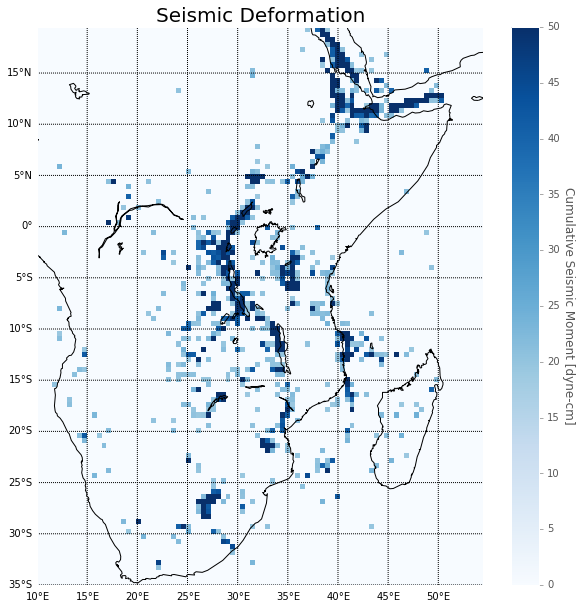

In [399]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='cyl', llcrnrlon=min(lon_bins), llcrnrlat=min(lat_bins),
            urcrnrlon=max(lon_bins), urcrnrlat=max(lat_bins), resolution='l')
x, y = m(lon_bins,lat_bins)
x0, y0 = m(lon_min,lat_min)
x1, y1 = m(lon_max,lat_max)
# im = plt.imshow(np.flipud(M0.transpose()), extent=(x0, x1, y0, y1),)
# plt.show()

###
fig, ax = plt.subplots(figsize=(10,10))
m.drawcoastlines()
m.shadedrelief()
# x,y = m(lon_bins,lat_bins)
cax = m.imshow(M0.transpose(), 
          cmap=plt.cm.Blues, 
          interpolation='None',
          clim=([0,50]),
          extent=(x0, x1, y0, y1),
          aspect="auto")

m.drawparallels(np.arange(lat_min,lat_max,5),labels=[True,False,False,True])
m.drawmeridians(np.arange(lon_min,lon_max,5),labels=[True,False,False,True])

cbar = fig.colorbar(cax)
ax.set_title('Seismic Deformation',fontsize=20)
cbar.ax.set_ylabel('Cumulative Seismic Moment [dyne-cm]',rotation=270, labelpad=15);
# ax.set_ylabel('Latitude')
# ax.set_xlabel('Longitude')
fig.savefig('fig1.pdf')

### Determine pincipal stress orientation from Moment tensors

Using a download all EARS events from Harvard CMT, consider the average and std of all events as an observation of the principal stress directios over diffrent segments of the EARS. Decompse the average moment tensor and use the eigenvalues to determine the azimuth and plunge of each direction

In [397]:
#download Harvard CMT catalog between lat,lon bounds above
#sum Mij to M in each location
M=np.random.random([3,3])# dummy for now
#decompose with pca
[D,V]=np.linalg.eig(M)

In [398]:
# % DEFINE AZIMUTH using second and third elements (y,x) of eigenvectors
# %
# %   Second element is the y coordinate, convention being +y south 
# %
# %   Third element is x, convention being +x east
# %
az=np.zeros([3])
pl=np.zeros([3])

# %e1
if V[1,0]<0 and V[2,0]>=0:
    az[0]=(180/np.pi)*(np.arctan(abs(V[2,0]/V[1,0])));
elif V[1,0]>=0 and V[2,0]>=0:
     az[0]=360-(180/np.pi)*(np.arctan(abs(V[2,0]/V[1,0])));
elif V[1,0]>=0 and V[2,0]<0:
     az[0]=(180/np.pi)*(np.arctan(abs(V[2,0]/V[1,0])));
elif V[1,0]<0 and V[2,0]<0:
     az[0]=360-(180/np.pi)*(np.arctan(abs(V[2,0]/V[1,0])));   

# %e2
if V[1,1]<0 and V[2,1]>=0:
    az[1]=(180/np.pi)*(np.arctan(abs(V[2,1]/V[1,1])));
elif V[1,1]>=0 and V[2,1]>=0:
    az[1]=360-(180/np.pi)*(np.arctan(abs(V[2,1]/V[1,1])));
elif V[1,1]>=0 and V[2,1]<0:
    az[1]=(180/np.pi)*(np.arctan(abs(V[2,1]/V[1,1])));
elif V[1,1]<0 and V[2,1]<0:
    az[1]=360-(180/np.pi)*(np.arctan(abs(V[2,1]/V[1,1])));   

# %e3
if V[1,2]<0 and V[2,2]>=0:
    az[2]=(180/np.pi)*(np.arctan(abs(V[2,2]/V[1,2])));
elif V[1,2]>=0 and V[2,2]>=0:
    az[2]=360-(180/np.pi)*(np.arctan(abs(V[2,2]/V[1,2])));
elif V[1,2]>=0 and V[2,2]<0:
    az[2]=(180/np.pi)*(np.arctan(abs(V(2,2)/V[1,2])));
elif V[2,3]<0 and V[3,3]<0:
    az[2]=360-(180/np.pi)*(np.arctan(abs(V[2,2]/V[1,2])));   


# %plunge
pl[0]=90-(180/np.pi)*np.arccos(abs(V[0,1]))
pl[1]=90-(180/np.pi)*np.arccos(abs(V[0,1]))
pl[2]=90-(180/np.pi)*np.arccos(abs(V[0,2]))

print(az)
print(pl)

[ 310.39731122  354.05041047   52.69346237]
[ 35.54785437  35.54785437  12.05941612]
